In [4]:
# Import the needed referrences

import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Shuffle the datasets
from sklearn.utils import shuffle 

# Learning Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import seaborn as sns
%matplotlib inline

In [5]:
addpoly = True
plot_lc = 0 # 1- to display learning curve # 0 - not to display

In [6]:
train_dataset = pd.read_csv("C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Classification Datasets/Various Datasets/titanic_train.csv")

In [7]:
train_dataset.shape

(891, 12)

In [8]:
train_dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
train_dataset.shape[0]

891

In [10]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
print("ID is unique..") if train_dataset.PassengerId.nunique() == train_dataset.shape[0] else print("oops..!")

ID is unique..


In [12]:
print('We do not need to worry about missing values.') if train_dataset.count().min() == train_dataset.shape[0] else print("Oops..!")

Oops..!


In [13]:
dtypes_def = train_dataset.dtypes.reset_index()
dtypes_def.columns = ['Count','Column Type']
dtypes_def.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,5
1,float64,2
2,object,5


In [14]:
dtypes_def

,Count,Column Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [15]:
datasetHasNan = True

In [16]:
if datasetHasNan == True:
    nas = pd.concat([train_dataset.isnull().sum()], axis=1, keys=['Train Dataset']) 
    print('Nan in the dataset')
    print(nas[nas.sum(axis=1) > 0])

Nan in the dataset
          Train Dataset
Age                 177
Cabin               687
Embarked              2


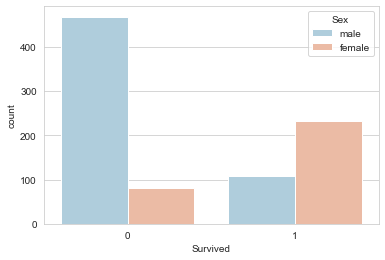

In [17]:
#count plot of people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_dataset,palette='RdBu_r')

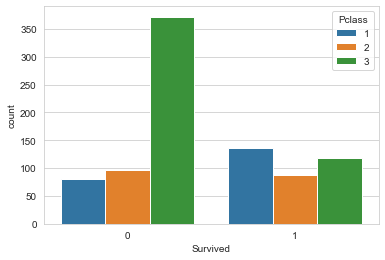

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_dataset)

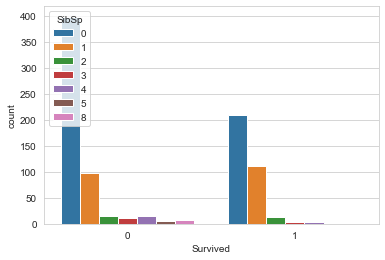

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train_dataset)

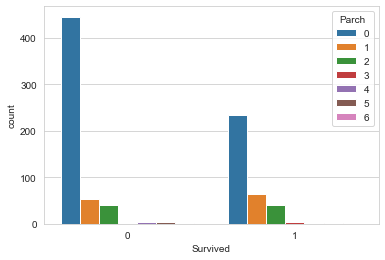

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=train_dataset)

In [21]:
train_dataset["Age"].std()

14.526497332334044

In [22]:
train_dataset["Age"].mean()

29.69911764705882

In [23]:
train_dataset["Age"].isnull().sum()

177

In [24]:
train_dataset['Age'].dtype

dtype('float64')

In [25]:
train_random_ages = np.random.randint(train_dataset["Age"].mean() - train_dataset["Age"].std(),
                                          train_dataset["Age"].mean() + train_dataset["Age"].std(),
                                          size = train_dataset["Age"].isnull().sum())
train_dataset["Age"][np.isnan(train_dataset["Age"])] = train_random_ages
train_dataset['Age'] = np.int64(train_dataset['Age'])

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
train_dataset['Age'].dtype

dtype('int64')

In [27]:
dtypes_df = train_dataset.dtypes.reset_index()
dtypes_df.columns = ['Count','Column Type']
dtypes_df.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,6
1,float64,1
2,object,5


In [28]:
train_dataset["Embarked"].fillna('S', inplace=True)

In [29]:
train_dataset['Port'] = train_dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [30]:
del train_dataset['Embarked']

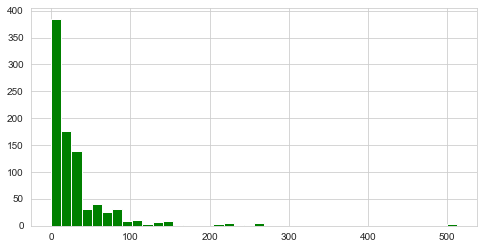

In [31]:
#distribution plot of the ticket fare
train_dataset['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [32]:
# Engineer New Features

train_dataset['Has_Cabin'] = train_dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [33]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,0,0


In [34]:
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch'] + 1

In [35]:
train_dataset['IsAlone'] = 0
train_dataset.loc[train_dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [36]:
# Get titles from the names using regular Expression
train_dataset['Title'] = train_dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_dataset['Title'] = train_dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_dataset['Title'] = train_dataset['Title'].replace('Mlle', 'Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Ms', 'Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Mme', 'Mrs')

In [37]:
## Create new column "FamilySizeGroup" and assign "Alone", "Small" and "Big"
train_dataset['FamilySizeGroup'] = 'Small'
train_dataset.loc[train_dataset['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
train_dataset.loc[train_dataset['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'

In [38]:
## Get the average survival rate of different FamilySizes
train_dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [39]:
train_dataset['Sex'] = train_dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [40]:
train_dataset.loc[ train_dataset['Age'] <= 14, 'Age'] = 0
train_dataset.loc[(train_dataset['Age'] > 14) & (train_dataset['Age'] <= 32), 'Age'] = 1
train_dataset.loc[(train_dataset['Age'] > 32) & (train_dataset['Age'] <= 48), 'Age'] = 2
train_dataset.loc[(train_dataset['Age'] > 48) & (train_dataset['Age'] <= 64), 'Age'] = 3
train_dataset.loc[ train_dataset['Age'] > 64, 'Age'] = 4

In [41]:
train_dataset.loc[ train_dataset['Fare'] <= 7.91, 'Fare'] = 0
train_dataset.loc[(train_dataset['Fare'] > 7.91) & (train_dataset['Fare'] <= 14.454), 'Fare'] = 1
train_dataset.loc[(train_dataset['Fare'] > 14.454) & (train_dataset['Fare'] <= 31), 'Fare']   = 2
train_dataset.loc[ train_dataset['Fare'] > 31, 'Fare'] = 3
train_dataset['Fare'] = train_dataset['Fare'].astype(int)

In [42]:
# map the features
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
family_mapping = {"Small": 0, "Alone": 1, "Big": 2}

train_dataset['Title'] = train_dataset['Title'].map(title_mapping)
train_dataset['FamilySizeGroup'] = train_dataset['FamilySizeGroup'].map(family_mapping)

In [43]:
#Engineering new Features
train_dataset['IsChildandRich'] = 0
train_dataset.loc[(train_dataset['Age'] <= 0) & (train_dataset['Pclass'] == 1 ),'IsChildandRich'] = 1  
train_dataset.loc[(train_dataset['Age'] <= 0) & (train_dataset['Pclass'] == 2 ),'IsChildandRich'] = 1 

In [44]:
#classify cabin by fare
train_dataset['Cabin'] = train_dataset['Cabin'].fillna('X')
train_dataset['Cabin'] = train_dataset['Cabin'].apply(lambda x: str(x)[0])
train_dataset['Cabin'] = train_dataset['Cabin'].replace(['A', 'D', 'E', 'T'], 'M')
train_dataset['Cabin'] = train_dataset['Cabin'].replace(['B', 'C'], 'H')
train_dataset['Cabin'] = train_dataset['Cabin'].replace(['F', 'G'], 'L')
train_dataset['Cabin'] = train_dataset['Cabin'].map({'X': 0, 'L': 1, 'M': 2, 'H': 3}).astype(int)

In [45]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port,Has_Cabin,FamilySize,IsAlone,Title,FamilySizeGroup,IsChildandRich
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,0,0,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,3,1,1,2,0,3,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,0,0,1,1,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,3,0,1,2,0,3,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,0,0,1,1,1,1,0


In [46]:
del train_dataset['Name']

del train_dataset['SibSp']

del train_dataset['Parch']

del train_dataset['FamilySize']

del train_dataset['Cabin']

# Delete Ticket column from datasets  (No need for them in the analysis)
del train_dataset['Ticket']

del train_dataset['Port']


In [47]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Has_Cabin,IsAlone,Title,FamilySizeGroup,IsChildandRich
0,1,0,3,0,1,0,0,0,1,0,0
1,2,1,1,1,2,3,1,0,3,0,0
2,3,1,3,1,1,1,0,1,2,1,0
3,4,1,1,1,2,3,1,0,3,0,0
4,5,0,3,0,2,1,0,1,1,1,0


In [48]:
# Split data for training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dataset.drop('Survived',axis=1), 
           train_dataset['Survived'], test_size=0.30, 
            random_state=101)

In [49]:
# Logistic Regression
logreg = LogisticRegression() #(C=0.1, penalty='l1', tol=1e-6)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

result_train = logreg.score(X_train, y_train)
result_val = cross_val_score(logreg,X_train, y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.8314606741573034 , while validation score = 0.8282709677419355


C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [50]:
# SVM
svc = SVC(C = 0.1, gamma=0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

result_train = svc.score(X_train, y_train)
result_val = cross_val_score(svc,X_train, y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.6340288924558587 , while validation score = 0.6340387096774194


In [51]:
# Random Forest Classifier
random_forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

seed= 42
random_forest =RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, 
                           n_jobs=1, random_state=seed,verbose=0)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

result_train = random_forest.score(X_train, y_train)
result_val = cross_val_score(random_forest,X_train, y_train, cv=5).mean()

print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.8571428571428571 , while validation score = 0.8218580645161289
